In [1]:
import sys
import os
from dotenv import load_dotenv
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../databases')))
from connections.database_connector import DatabaseConnection
from data_loader.teleco_data_loader import TelecoDataLoader
from cleaning.data_cleaning import DataCleaner
from over_view_analysis.user_over_view_analysis import UserOverviewAnalysis
from over_view_analysis.telecom_eda import TelecomEDA
from over_view_analysis.telecom_data_anlyzer import TelecomDataAnalyzer
load_dotenv()

True

In [2]:
#  Initialize and connect to the database
db_connection = DatabaseConnection(
    db_name=os.getenv('DB_NAME'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    host=os.getenv('DB_HOST'),
    port=os.getenv('DB_PORT')
)
db_connection.connect()

Connection to PostgreSQL DB successful


In [3]:
# Initialize the TelecoDataLoader object with the database connection
data_loader = TelecoDataLoader(db_connection=db_connection)

# Load the data into a pandas DataFrame
df = data_loader.load_data("xdr_data")
# df = pd.DataFrame(data)

print(type(df))
df.head()
# print(df.head())

# df.info()
# Close the database connection when done
db_connection.close()

/mnt/d/tutorial/10x/tasks/task_2/customer-insights-analytics/src/data_loader/teleco_data_loader.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


<class 'pandas.core.frame.DataFrame'>
Connection closed.


In [4]:
# Initialize the DataCleaner object with the DataFrame
data_cleaner = DataCleaner(df)

# Clean the data
data_cleaner.clean_data()  # No need to assign, as it modifies df in place

#change kbs and bytes to mb
data_cleaner.convert_units_to_mb()

# Handle missing values and outliers
data_cleaner.handle_missing_and_outliers()

# Access the cleaned DataFrame
cleaned_df = data_cleaner.df


columns_in_bytes:  ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
columns_in_kb:  ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
Unit conversion complete: Bytes and kbps columns converted to MB.
Missing values and outliers treated.


In [5]:
analyzer = TelecomDataAnalyzer(cleaned_df)
recommendations = analyzer.generate_recommendations()


### Top 10 Handsets

In [6]:
recommendations['Top 10 Handsets']

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Samsung Galaxy A5 Sm-A520F       3700
Name: count, dtype: int64

### Top 3 Manufacturers

In [7]:
recommendations['Top 3 Manufacturers']

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64

### Top 5 Handsets per Manufacturer

In [8]:
recommendations['Top 5 Handsets per Manufacturer']

{'Apple': Handset Type
 Apple iPhone 6S (A1688)    9395
 Apple iPhone 6 (A1586)     8993
 Apple iPhone 7 (A1778)     6279
 Apple iPhone Se (A1723)    5165
 Apple iPhone 8 (A1905)     4977
 Name: count, dtype: int64,
 'Samsung': Handset Type
 Samsung Galaxy S8 (Sm-G950F)    4464
 Samsung Galaxy A5 Sm-A520F      3700
 Samsung Galaxy J5 (Sm-J530)     3675
 Samsung Galaxy J3 (Sm-J330)     3456
 Samsung Galaxy S7 (Sm-G930X)    3171
 Name: count, dtype: int64,
 'Huawei': Handset Type
 Huawei B528S-23A                  19727
 Huawei E5180                       2074
 Huawei P20 Lite Huawei Nova 3E     2012
 Huawei P20                         1475
 Huawei Y6 2018                      996
 Name: count, dtype: int64}

# Marketing Recommendations

### Handset Promotion Strategy

In [9]:
recommendations['Marketing Recommendations']['Handset Promotion Strategy']

'Consider launching device-specific promotions for popular models such as Huawei B528S-23A, Apple iPhone 6S (A1688), Apple iPhone 6 (A1586).'

### Manufacturer Partnership Strategy

In [10]:
recommendations['Marketing Recommendations']['Manufacturer Partnership Strategy']

'The top manufacturers are Apple, Samsung, Huawei. Partnering with these companies could be beneficial for targeted promotions.'

### Handset-Specific Recommendations

In [11]:
recommendations['Marketing Recommendations']['Handset-Specific Recommendations']

'For Apple, consider marketing or bundling offers for the following top handsets: Apple iPhone 6S (A1688), Apple iPhone 6 (A1586), Apple iPhone 7 (A1778), Apple iPhone Se (A1723), Apple iPhone 8 (A1905).\nFor Samsung, consider marketing or bundling offers for the following top handsets: Samsung Galaxy S8 (Sm-G950F), Samsung Galaxy A5 Sm-A520F, Samsung Galaxy J5 (Sm-J530), Samsung Galaxy J3 (Sm-J330), Samsung Galaxy S7 (Sm-G930X).\nFor Huawei, consider marketing or bundling offers for the following top handsets: Huawei B528S-23A, Huawei E5180, Huawei P20 Lite Huawei Nova 3E, Huawei P20, Huawei Y6 2018.'

                IMSI  Total Social Media Data (Bytes)  \
57166   2.082016e+14                      2739.817734   
15750   2.082010e+14                        27.103117   
71320   2.082017e+14                        28.294544   
100323  2.082021e+14                        39.750751   
36490   2.082014e+14                        43.374779   

        Total Google Data (Bytes)  Total YouTube Data (Bytes)  \
57166                11618.231475                33974.382810   
15750                  140.249281                  442.131009   
71320                  127.973787                  394.370218   
100323                 121.163664                  384.807098   
36490                  144.437466                  374.483047   

        Total Netflix Data (Bytes)  Total Gaming Data (Bytes)  \
57166                 33841.057766              635379.627010   
15750                   334.550753                7318.434483   
71320                   361.401046                7749.432234   
100323

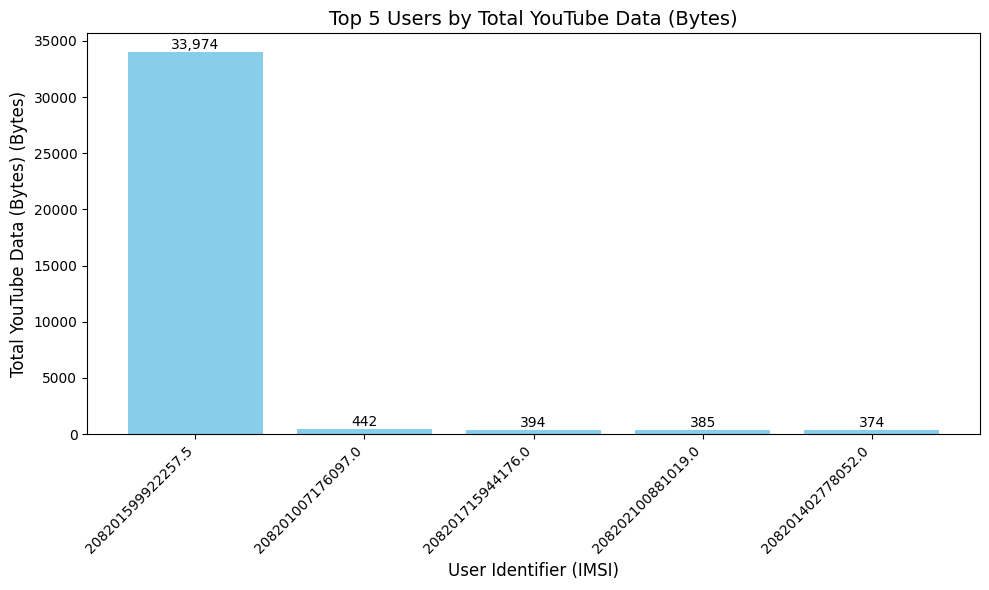

     Handset Manufacturer             Handset Type  \
315                Huawei         Huawei B528S-23A   
60                  Apple  Apple iPhone 6S (A1688)   
56                  Apple   Apple iPhone 6 (A1586)   
1390            undefined                  Unknown   
66                  Apple   Apple iPhone 7 (A1778)   

      Total YouTube Data (Bytes)  Total Netflix Data (Bytes)  \
315                442716.225056               440749.930521   
60                 213281.317371               210792.932772   
56                 201733.163153               201941.581086   
1390               199792.266026               199672.857703   
66                 141664.163944               141271.522409   

      Total Social Media Data (Bytes)  
315                      35721.475279  
60                       17056.782076  
56                       16464.209692  
1390                     16090.542858  
66                       11340.736704  


In [12]:
# Calculate total data usage for each application
analyzer.calculate_total_usage()

# Aggregate data by user (IMSI, MSISDN, etc.)
user_data = analyzer.aggregate_data_by_user('IMSI')

# Print the top 5 users by YouTube data usage
print(analyzer.get_top_users(user_data, 'Total YouTube Data (Bytes)', top_n=5))

# Visualize the top 5 users by YouTube data usage
analyzer.plot_top_users(user_data, 'Total YouTube Data (Bytes)', top_n=5)

# Aggregate data by handset and print handsets with the highest Netflix data usage
handset_data = analyzer.aggregate_data_by_handset()
print(handset_data.head())

In [13]:

# Initialize the UserOverviewAnalysis object with the cleaned data
user_analysis = UserOverviewAnalysis(cleaned_df)

# Run the aggregation analysis
user_overview = user_analysis.aggregate_user_data()

# Display the aggregated result
user_overview.head()

,MSISDN/Number,num_sessions,total_duration,total_dl_data,total_ul_data,youtube_dl,youtube_ul,netflix_dl,netflix_ul,gaming_dl,gaming_ul,total_data_volume
0,3.360100e+10,1,116720.0,842.637466,36.053108,14.900201,6.724347,10.265105,16.915876,811.091133,1.367528,878.690574
1,3.360100e+10,1,181230.0,120.755184,36.104459,5.324251,7.107972,0.770569,10.451194,105.035298,14.714780,156.859643
2,3.360100e+10,1,134969.0,556.659663,39.306820,2.137272,19.196298,16.525919,2.827981,529.068485,9.759228,595.966483
3,3.360101e+10,1,49878.0,401.993172,20.327526,4.393123,2.584198,1.157362,0.784730,388.074835,3.051292,422.320698
4,3.360101e+10,2,37104.0,1363.130417,94.280527,10.339971,31.193031,24.971647,24.230077,1308.981093,5.816727,1457.410944


In [14]:
eda = TelecomEDA(cleaned_df)

eda.describe_variables()

Dataset Description:
          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.485060e+05  148506.000000  148506.000000  148506.000000   
mean   1.011702e+19     494.651488     493.814479  100412.949872   
std    2.877799e+18     284.587929     283.844496   62750.944601   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   58248.750000   
50%    7.349883e+18     499.000000     498.640196   86399.000000   
75%    1.304243e+19     739.000000     739.000000  129855.000000   
max    1.311448e+19     990.000000     989.000000  399441.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.485060e+05   1.485060e+05  1.485060e+05    148506.000000   
mean   2.082015e+14   3.375585e+10  4.810786e+13        57.822257   
std    1.522034e+10   8.206044e+08  2.208025e+13        86.658303   
min    2.040471e+14   3.360100e+10  4.400152e+11         0.000000   
25%    2.082014e+14  

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Social Media Data (Bytes),Total Google Data (Bytes),Total YouTube Data (Bytes),Total Netflix Data (Bytes),Total Gaming Data (Bytes),Total Other Data (Bytes)
count,1.485060e+05,148506.000000,148506.000000,148506.000000,1.485060e+05,1.485060e+05,1.485060e+05,148506.000000,148506.000000,148506.000000,...,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000,148506.000000
mean,1.011702e+19,494.651488,493.814479,100412.949872,2.082015e+14,3.375585e+10,4.810786e+13,57.822257,9.669684,1.511264,...,416.970313,8.180492,40.839389,450.432672,1.810001,7.731033,22.418286,22.404827,426.097851,425.150805
std,2.877799e+18,284.587929,283.844496,62750.944601,1.522034e+10,8.206044e+08,2.208025e+13,86.658303,15.769678,2.567373,...,239.506164,4.696763,10.919677,240.449191,1.020196,3.463688,9.110291,9.126282,240.421472,239.564603
min,6.917538e+18,0.000000,0.000000,7142.000000,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,0.003290,0.000148,2.866892,7.114041,0.001563,0.040330,0.078903,0.098432,0.306358,0.149045
25%,7.349883e+18,250.000000,251.000000,58248.750000,2.082014e+14,3.365131e+10,3.546071e+13,24.000000,1.000000,0.005375,...,210.304184,4.144179,33.218278,243.126304,0.931732,4.928513,15.856432,15.848411,218.650269,218.563888
50%,7.349883e+18,499.000000,498.640196,86399.000000,2.082015e+14,3.366371e+10,3.572231e+13,38.000000,4.000000,0.007875,...,421.152465,8.262685,41.119373,454.664032,1.814390,7.739379,22.440265,22.408149,428.520974,427.190380
75%,1.304243e+19,739.000000,739.000000,129855.000000,2.082018e+14,3.368352e+10,4.850068e+13,62.000000,11.000000,2.286344,...,622.790707,12.210942,48.664941,656.909624,2.691221,10.547293,28.975482,28.972556,633.116050,631.139083
max,1.311448e+19,990.000000,989.000000,399441.000000,2.082099e+14,4.190654e+10,8.694800e+13,939.000000,135.000000,12.896250,...,834.692199,16.389314,66.385452,869.521157,3.612327,15.414696,44.716565,44.738845,851.053240,850.708896


In [ ]:

# Step 3: Segment users into decile classes and compute total data
decile_summary = eda.segment_users_by_decile()

# Step 4: Analyze basic metrics (mean, median, std)
basic_metrics = eda.basic_metrics()

# Step 5: Conduct a non-graphical univariate analysis (dispersion)
univariate_stats = eda.univariate_analysis()

# Step 6: Perform graphical univariate analysis
eda.graphical_univariate_analysis()

# Step 7: Perform bivariate analysis (Application type vs DL+UL data)
eda.bivariate_analysis()

# Step 8: Correlation matrix analysis
correlation_matrix = eda.correlation_analysis()

# Step 9: Dimensionality reduction using PCA
explained_variance = eda.dimensionality_reduction()

Decile Summary:
              total_duration    total_data
decile_class                              
0               8.404072e+08  4.179045e+07
1               3.588558e+09  6.797794e+07
2               1.115131e+09  1.854502e+07
3               3.439386e+09  4.166397e+07
4               5.928443e+09  4.177823e+07
Basic Metrics:
{'mean': Bearer Id                                   1.011702e+19
Start ms                                    4.946515e+02
End ms                                      4.938145e+02
total_duration                              1.004129e+05
IMSI                                        2.082015e+14
MSISDN/Number                               3.375585e+10
IMEI                                        4.810786e+13
Avg RTT DL (ms)                             5.782226e+01
Avg RTT UL (ms)                             9.669684e+00
Avg Bearer TP DL (kbps)                     1.511264e+00
Avg Bearer TP UL (kbps)                     1.840931e-01
TCP DL Retrans. Vol (Bytes)     